## installing the requirements

In [2]:
import numpy as np
import matplotlib as plt
import seaborn as sns
import cv2
from matplotlib import pyplot as plt

In [3]:
import tensorflow as tf

In [4]:
from PIL import Image
tf.random.set_seed(3)
from tensorflow import keras 
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

## loading the mnsit data from keras datastore

In [5]:
(X_train , Y_train ),(X_test,Y_test)=mnist.load_data()

In [6]:
type(X_train)

numpy.ndarray

In [7]:
#shape o the numpy array
print(X_train.shape , Y_train.shape,X_test.shape,Y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [8]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [9]:
Y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

## the above data shows that the x_train is having 60000 sample images of numers having 28*28 pixels and y is showing the results(labels)

### and the testing data we have 10000 each

## and the images in grayscale thats why we dont have the colors of the data ( b&w) means only one color channel

### training_data =60000 images
### test dta= 10000 images 
### dimentions =28*28

In [10]:
print(X_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [11]:
print(X_train[10].shape)

(28, 28)


dispalying the image

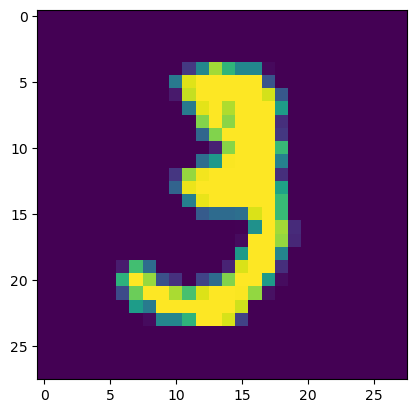

3


In [12]:
plt.imshow(X_train[10])
plt.show()
#print the corresponding label
print(Y_train[10])

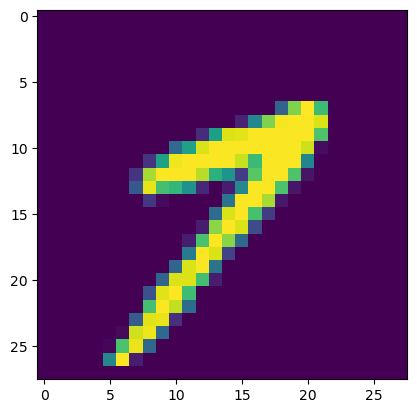

7


In [13]:
plt.imshow(X_train[141])
plt.show()
#print the corresponding label
print(Y_train[141])

#### unique values in Y_train


In [14]:
print(np.unique(Y_train))

[0 1 2 3 4 5 6 7 8 9]


In [15]:
print(np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9]


## we can use these labels as such we can also apply onehot encoding

### if the lable is 7 the 8th value(indexwise) will be one else 0s

### all the images have the same dimentions if not then we have to reshape them to the comman dimentions

### the intensity of the colors in X is from 0 to 255 , we need to do them in smaller(normalization)(standard scaling) (0 to 1)

In [16]:
X_train=X_train/255
X_test=X_test/255

In [17]:
X_test[5]


array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

### the images are not going to change bcz ratio or the color relations are not going to change 

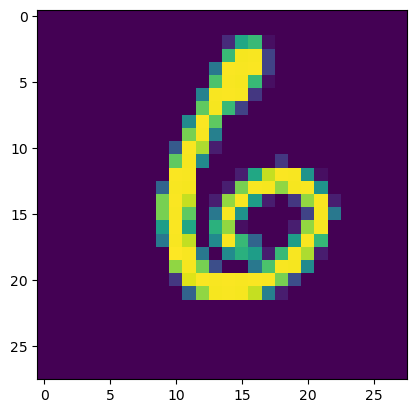

6


In [18]:
plt.imshow(X_train[1418])
plt.show()
#print the corresponding label
print(Y_train[1418])

# building neural network

# setting up the layers of the neural network

In [19]:

model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28,28)),
                          keras.layers.Dense(50, activation='relu'),
                          keras.layers.Dense(50, activation='relu'),
                          keras.layers.Dense(10, activation='sigmoid')
])

C:\Users\SAURABH SRIVASTAVA\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


## compiling the Neural Network

In [20]:
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

## training the Neural Network

In [21]:
model.fit(X_train, Y_train, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8486 - loss: 0.5160
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9560 - loss: 0.1483
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9680 - loss: 0.1063
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9748 - loss: 0.0842
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9796 - loss: 0.0696
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9827 - loss: 0.0579
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9861 - loss: 0.0489
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9877 - loss: 0.0424
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9886 - loss: 0.0374
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9892 - loss: 0.0344


## training data accuracy is 99% checking if  there is  overfitting (evaluaton)

## accuracy of the data 


In [22]:
loss,accuracy=model.evaluate(X_test,Y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9625 - loss: 0.1587


In [23]:
print(accuracy)

0.9667999744415283


### test data accuracy is ~97%

In [24]:
#shape of the data 
X_test.shape

(10000, 28, 28)

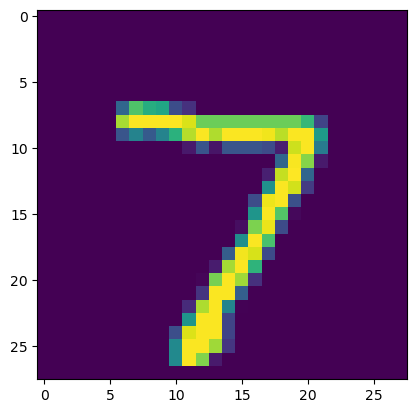

In [25]:
#first data point in the X_test
plt.imshow(X_test[0])
plt.show()

In [26]:
print(Y_test[0])

7


In [27]:
Y_pred=model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [28]:
Y_pred[0]

array([7.9954771e-06, 1.1181072e-03, 4.9871579e-01, 9.7291565e-01,
       7.9735683e-11, 6.6158562e-03, 1.3770572e-14, 9.9999970e-01,
       2.2180770e-04, 8.2746291e-01], dtype=float32)

## point to be noted  here is that unlike the machine learning classificaiton prediciton models the deep learning prediction model does not give the binary(0/1) output ----- it is giving the ((probability of each numbers (in our case) to be true )). the number which probability will be the most will be the resultant

In [29]:
# converting the prediction probabilities to class label

label_for_first_test_image = np.argmax(Y_pred[0])
print(label_for_first_test_image)

7


In [30]:
# converting the prediction probabilities to class label for all test data points
Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 8, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 2, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 9, 1, 7, 6, 9, 6, 0, 5, 4, 5, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 2, 9, 8, 5, 5, 1, 5, 6, 9, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 6, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

# y_test is our true lebels and Y_pred_labels represent my predicted labels

# we can evaluate it with confusion matrix

In [31]:
conf_mat=confusion_matrix(Y_test,Y_pred_labels)

In [32]:
print(conf_mat)

tf.Tensor(
[[ 935    0    2    2    0    3    2    1    1   34]
 [   0 1091    4    8    1    1    8    4   18    0]
 [   1    0  991   16    4    0    3    7    8    2]
 [   0    0    4  993    0    2    0    2    5    4]
 [   2    0    2    0  957    0    5    2    2   12]
 [   2    0    0   26    0  849    5    0    8    2]
 [   3    2    1    1    2    6  939    1    3    0]
 [   0    1    8    7    1    1    0  996    1   13]
 [   2    0    5   20    3    3    2    1  933    5]
 [   1    1    0   10    9    2    0    4    3  979]], shape=(10, 10), dtype=int32)


In [33]:
#using seborn to check the heatmap

Text(0.5, 47.7222222222222, 'predicted label')

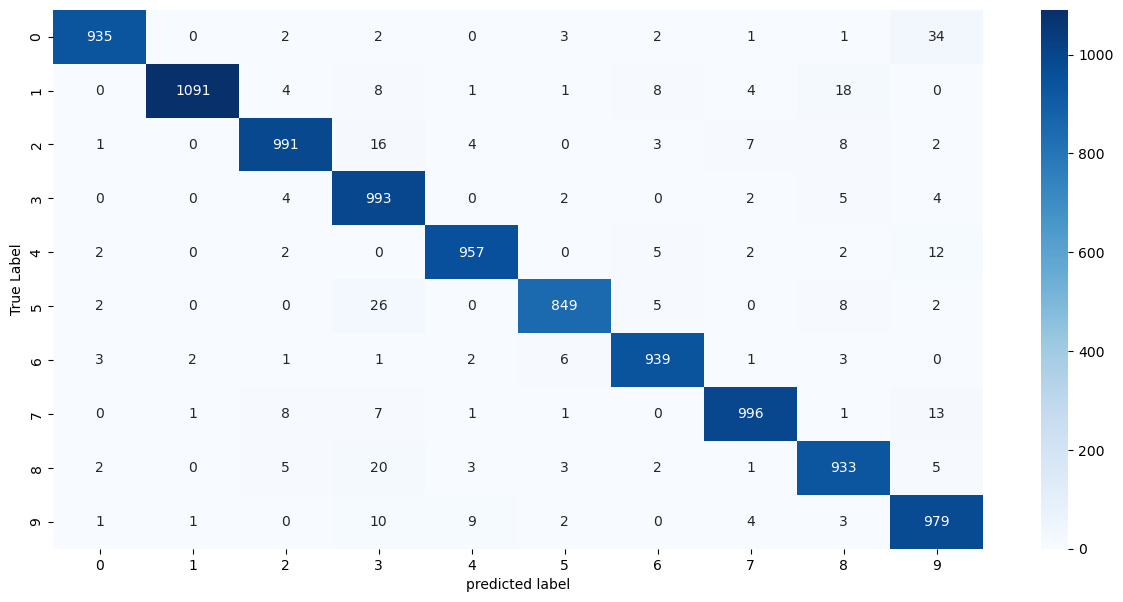

In [34]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat,annot=True,fmt='d',cmap='Blues')#d is for all the values are integers
plt.ylabel('True Label')
plt.xlabel('predicted label')

## it says that the 965 images of 0 has been predicted to 0 nad so on

 ## building the predictive sysyem

In [35]:
import os


In [36]:
print(os.getcwd())

C:\Users\SAURABH SRIVASTAVA


In [37]:
print(os.listdir())

['.anaconda', '.conda', '.condarc', '.continuum', '.dotnet', '.git', '.gitconfig', '.ipynb_checkpoints', '.ipython', '.jupyter', '.keras', '.librarymanager', '.matplotlib', '.packettracer', '.templateengine', '.vscode', '100-days-of-machine-learning-main', '3D Objects', '5.png', '7.png', '9.png', 'AppData', 'Application Data', 'BigMart_Train-Copy1.csv', 'Cisco Packet Tracer 7.3.0', 'Cisco Packet Tracer 8.2.1', 'Contacts', 'Cookies', 'cpp', 'Documents', 'Downloads', 'Favorites', 'IntelGraphicsProfiles', 'Links', 'Local Settings', 'MNIST_digit.png', 'Music', 'My Documents', 'NetHood', 'new', 'notebook_implem_of_digit_recognition_system.ipynb', 'NTUSER.DAT', 'ntuser.dat.LOG1', 'ntuser.dat.LOG2', 'NTUSER.DAT{53b39e88-18c4-11ea-a811-000d3aa4692b}.TM.blf', 'NTUSER.DAT{53b39e88-18c4-11ea-a811-000d3aa4692b}.TMContainer00000000000000000001.regtrans-ms', 'NTUSER.DAT{53b39e88-18c4-11ea-a811-000d3aa4692b}.TMContainer00000000000000000002.regtrans-ms', 'ntuser.ini', 'OneDrive', 'Postman', 'PrintHood

In [38]:
input_image=cv2.imread('MNIST_digit.png')

In [39]:
type(input_image)

numpy.ndarray

In [40]:
print(input_image)

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


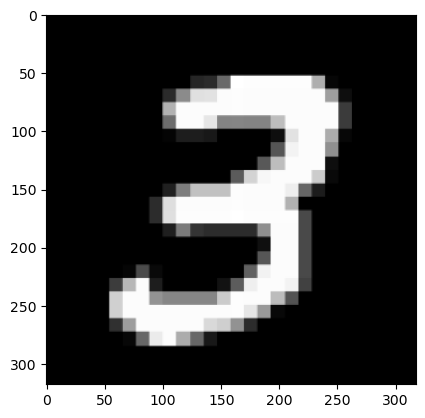

In [41]:
cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)
plt.imshow(input_image)

In [42]:
input_image.shape

(318, 318, 3)

In [43]:
## the 3 at the last  tells that its a rgb image 

## we have to convert this image to graysscale 

In [44]:
grayscale=cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

In [45]:
grayscale.shape

(318, 318)

## converted to grayscale

In [46]:
input_image_gray_resized=cv2.resize(grayscale,(28,28))

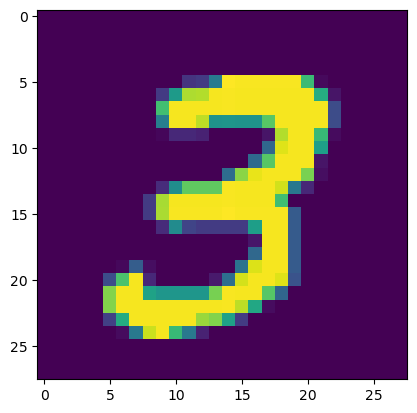

In [47]:
plt.imshow(input_image_gray_resized)

In [48]:
input_image_gray_resized.shape


(28, 28)

## now we have to do the standard scaling (0 to 1) in order to predict

In [49]:
input_image_gray_resized=input_image_gray_resized/255

In [50]:
input_image_gray_resized.shape

(28, 28)

In [51]:
image_reshaped=np.reshape(input_image_gray_resized,[1,28,28])
# it is showing that i am going to predict for only one image whose size is 28*28

In [52]:
input_prediction=model.predict(image_reshaped)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


In [53]:
input_prediction

array([[3.10477582e-13, 4.12937652e-06, 1.13395518e-02, 1.00000000e+00,
        1.20986146e-23, 3.39165241e-01, 3.08019260e-23, 3.72205068e-06,
        8.77475273e-03, 9.99846578e-01]], dtype=float32)

In [54]:
input_pred_label=np.argmax(input_prediction)


In [55]:
print(input_pred_label)

3


## predictive system (combining all processes)


Path of the image to be predicted: MNIST_digit.png


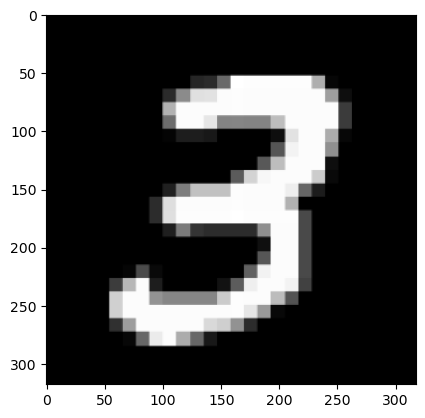

In [67]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

plt.imshow(input_image)



In [68]:
grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

input_image_resize = cv2.resize(grayscale, (28, 28))



In [69]:
input_image_resize

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  38,  43,
        105, 255, 253, 253, 253, 253, 253, 174,   6,   0,   0,   0,   0,
          0,   0],
       [  

In [70]:
input_image_resize = input_image_resize/255
input_image_resize

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [71]:


image_reshaped = np.reshape(input_image_resize, [1,28,28])


In [72]:
image_reshaped.shape



(1, 28, 28)

In [73]:
input_prediction = model.predict(image_reshaped)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


In [74]:
input_prediction

array([[3.10477582e-13, 4.12937652e-06, 1.13395518e-02, 1.00000000e+00,
        1.20986146e-23, 3.39165241e-01, 3.08019260e-23, 3.72205068e-06,
        8.77475273e-03, 9.99846578e-01]], dtype=float32)

In [75]:


input_pred_label = np.argmax(input_prediction)


In [76]:
print('The Handwritten Digit is recognised as ', input_pred_label)
      

The Handwritten Digit is recognised as  3
